# Gaia Dataset #2 (M13 Cluster)

### Create SkyCoord object representing M13

In [63]:
from astropy import units as u
from astropy.coordinates import SkyCoord
c = SkyCoord('16h41m41s', '+36d27m35.5s', frame = 'icrs')

#### Convert to degrees

In [64]:
c.dec.degree

36.45986111111112

In [65]:
c.ra.degree

250.4208333333333

In [66]:
import pandas as pd

In [67]:
data = pd.read_csv("M13.csv")

In [68]:
data

,ra,ra_error,dec,dec_error,parallax,parallax_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,bp_g,g_rp
0,250.210403,0.155934,36.506006,0.179071,0.872153,0.201508,18.970665,19.559586,18.175150,1.384436,0.588921,0.795515
1,250.233695,0.165174,36.519477,0.193368,0.089205,0.214014,19.038458,19.216787,18.547806,0.668982,0.178329,0.490652
2,250.433752,0.457370,36.539471,0.453590,0.752001,0.530961,20.140720,19.898542,19.235739,0.662804,-0.242178,0.904982
3,250.514669,0.148344,36.346602,0.182498,0.201993,0.202575,18.593836,18.786358,18.118933,0.667425,0.192522,0.474903
4,250.757883,0.314347,36.595053,0.379377,0.645419,0.409077,19.861362,20.309706,19.060225,1.249481,0.448343,0.801138
...,...,...,...,...,...,...,...,...,...,...,...,...
16039,250.213732,0.267580,36.637694,0.308502,1.673577,0.346489,19.686330,20.967340,18.437843,2.529497,1.281010,1.248487
16040,250.365140,0.597345,36.589396,0.669289,0.250989,0.838290,20.649916,20.772890,20.127192,0.645699,0.122974,0.522724
16041,250.328326,0.265317,36.603832,0.285100,0.990049,0.333307,19.676842,19.887138,19.227903,0.659235,0.210297,0.448938
16042,250.211912,0.503066,36.589667,0.578281,0.058116,0.660381,20.507488,20.696276,19.938790,0.757486,0.188787,0.568699


### Use parallax angles to calculate distance using formula:

$ d=1/p $

In [69]:
data.parallax

0        0.872153
1        0.089205
2        0.752001
3        0.201993
4        0.645419
           ...   
16039    1.673577
16040    0.250989
16041    0.990049
16042    0.058116
16043    0.256063
Name: parallax, Length: 16044, dtype: float64

In [70]:
#parallax to distance
import math

def distance(parallax):
    d = 1/(parallax)
    return d

In [71]:
data['distance'] = 1/data['parallax']

In [72]:
data

,ra,ra_error,dec,dec_error,parallax,parallax_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,bp_g,g_rp,distance
0,250.210403,0.155934,36.506006,0.179071,0.872153,0.201508,18.970665,19.559586,18.175150,1.384436,0.588921,0.795515,1.146587
1,250.233695,0.165174,36.519477,0.193368,0.089205,0.214014,19.038458,19.216787,18.547806,0.668982,0.178329,0.490652,11.210128
2,250.433752,0.457370,36.539471,0.453590,0.752001,0.530961,20.140720,19.898542,19.235739,0.662804,-0.242178,0.904982,1.329785
3,250.514669,0.148344,36.346602,0.182498,0.201993,0.202575,18.593836,18.786358,18.118933,0.667425,0.192522,0.474903,4.950668
4,250.757883,0.314347,36.595053,0.379377,0.645419,0.409077,19.861362,20.309706,19.060225,1.249481,0.448343,0.801138,1.549381
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16039,250.213732,0.267580,36.637694,0.308502,1.673577,0.346489,19.686330,20.967340,18.437843,2.529497,1.281010,1.248487,0.597523
16040,250.365140,0.597345,36.589396,0.669289,0.250989,0.838290,20.649916,20.772890,20.127192,0.645699,0.122974,0.522724,3.984242
16041,250.328326,0.265317,36.603832,0.285100,0.990049,0.333307,19.676842,19.887138,19.227903,0.659235,0.210297,0.448938,1.010051
16042,250.211912,0.503066,36.589667,0.578281,0.058116,0.660381,20.507488,20.696276,19.938790,0.757486,0.188787,0.568699,17.206836


### 2d plot of the cluster:

<IPython.core.display.Javascript object>


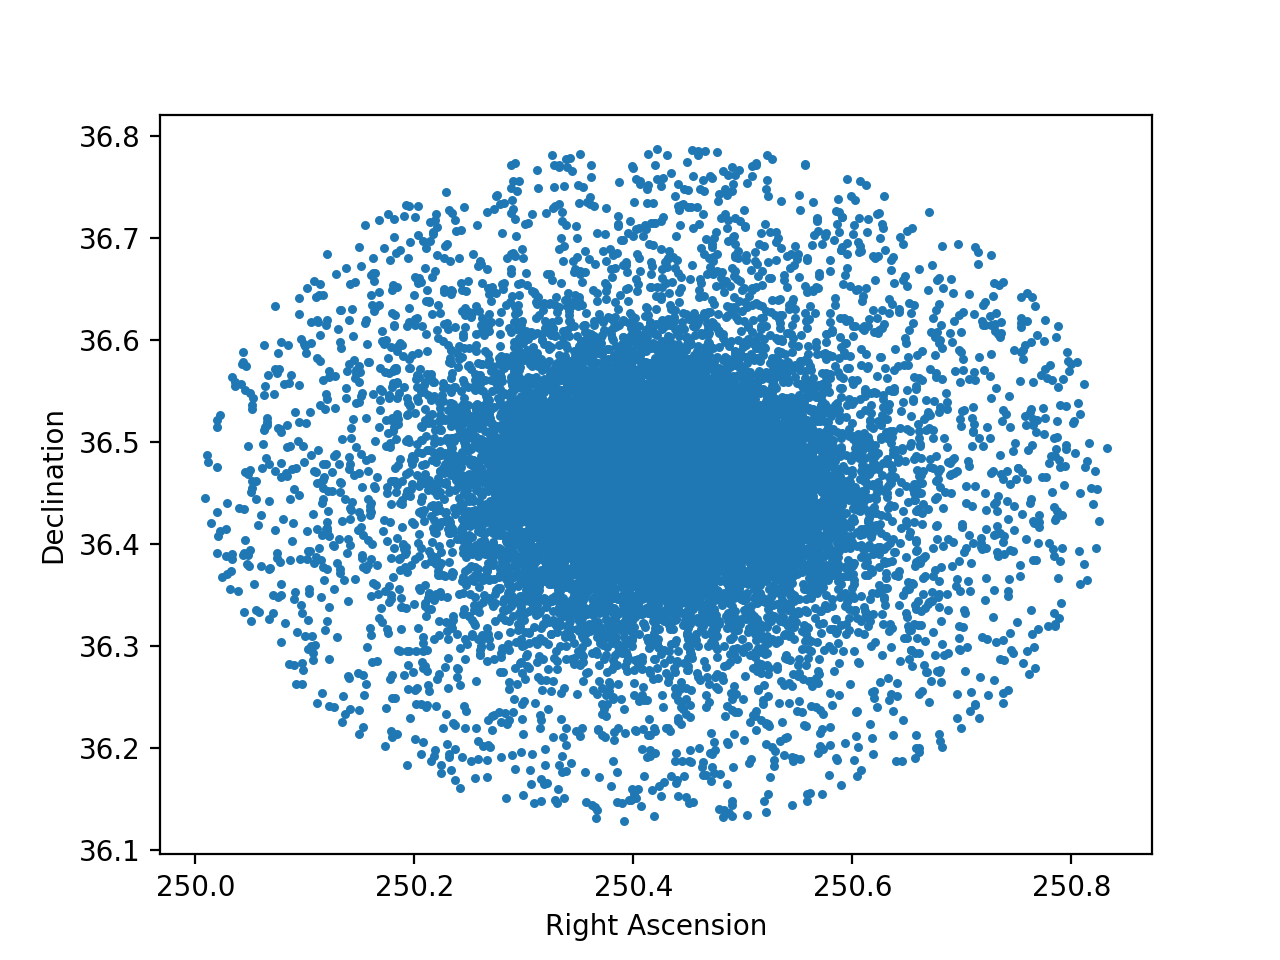

Text(0, 0.5, 'Declination')

In [110]:
%matplotlib notebook 
import matplotlib.pyplot as plt 
plt.scatter(data.ra, data.dec, s=5)
plt.xlabel('Right Ascension')
plt.ylabel('Declination')

### 3d plot of the cluster:

<IPython.core.display.Javascript object>


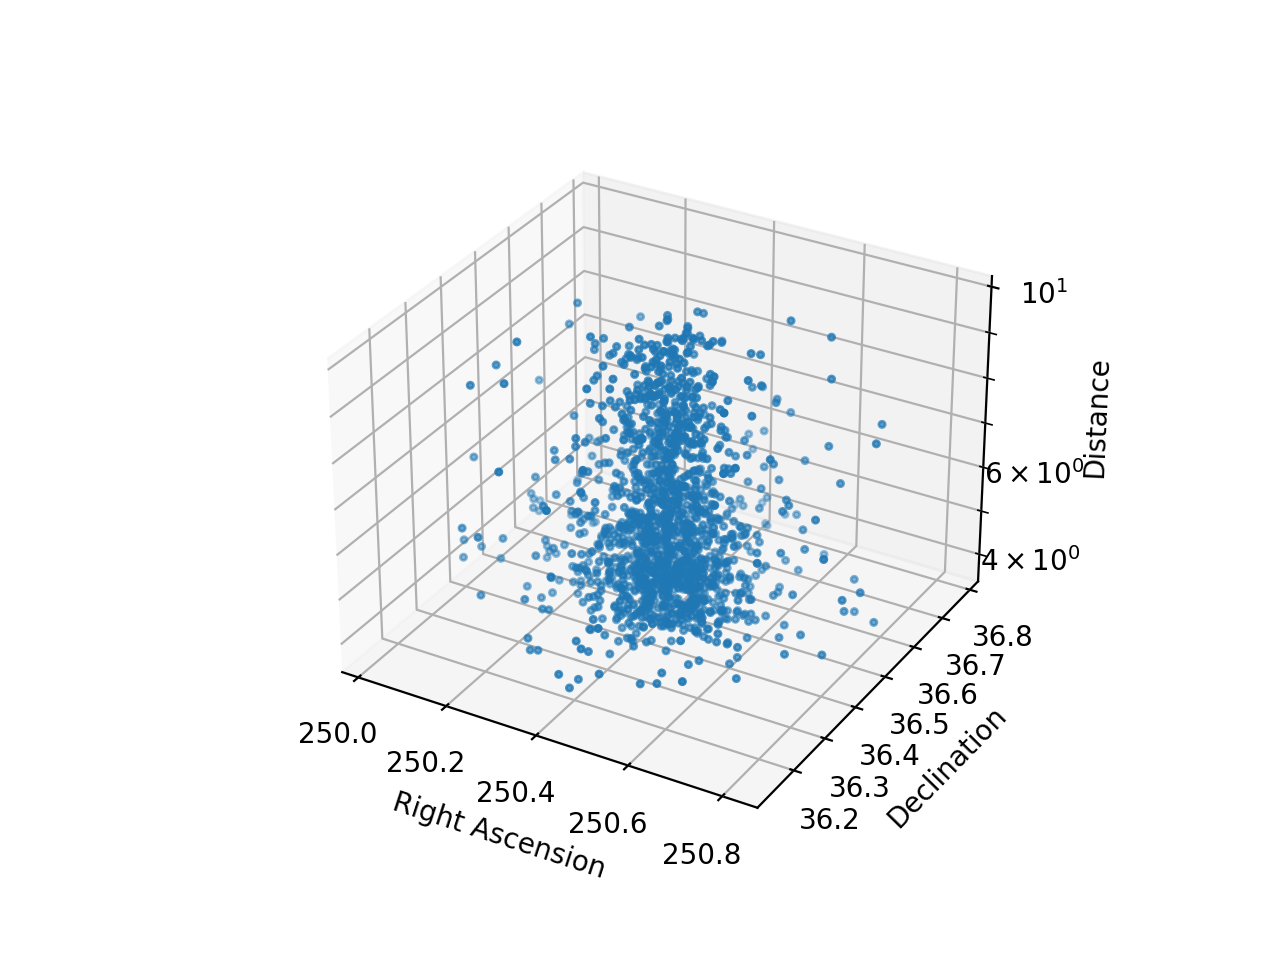

1555


In [111]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
filterdata = data[data.distance<data.distance.max()]
filterdata = filterdata[filterdata.distance>0]
filterdata = filterdata[filterdata.distance<6.8+3]
filterdata = filterdata[filterdata.distance>6.8-3]
filterdata = filterdata[filterdata.parallax/filterdata.parallax_error>1]
ax.scatter(filterdata.ra, filterdata.dec, filterdata.distance, s=5) 
ax.set_zscale('log')

ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')
ax.set_zlabel('Distance')
print(len(filterdata))

#### Histogram of filterdata distances

<IPython.core.display.Javascript object>


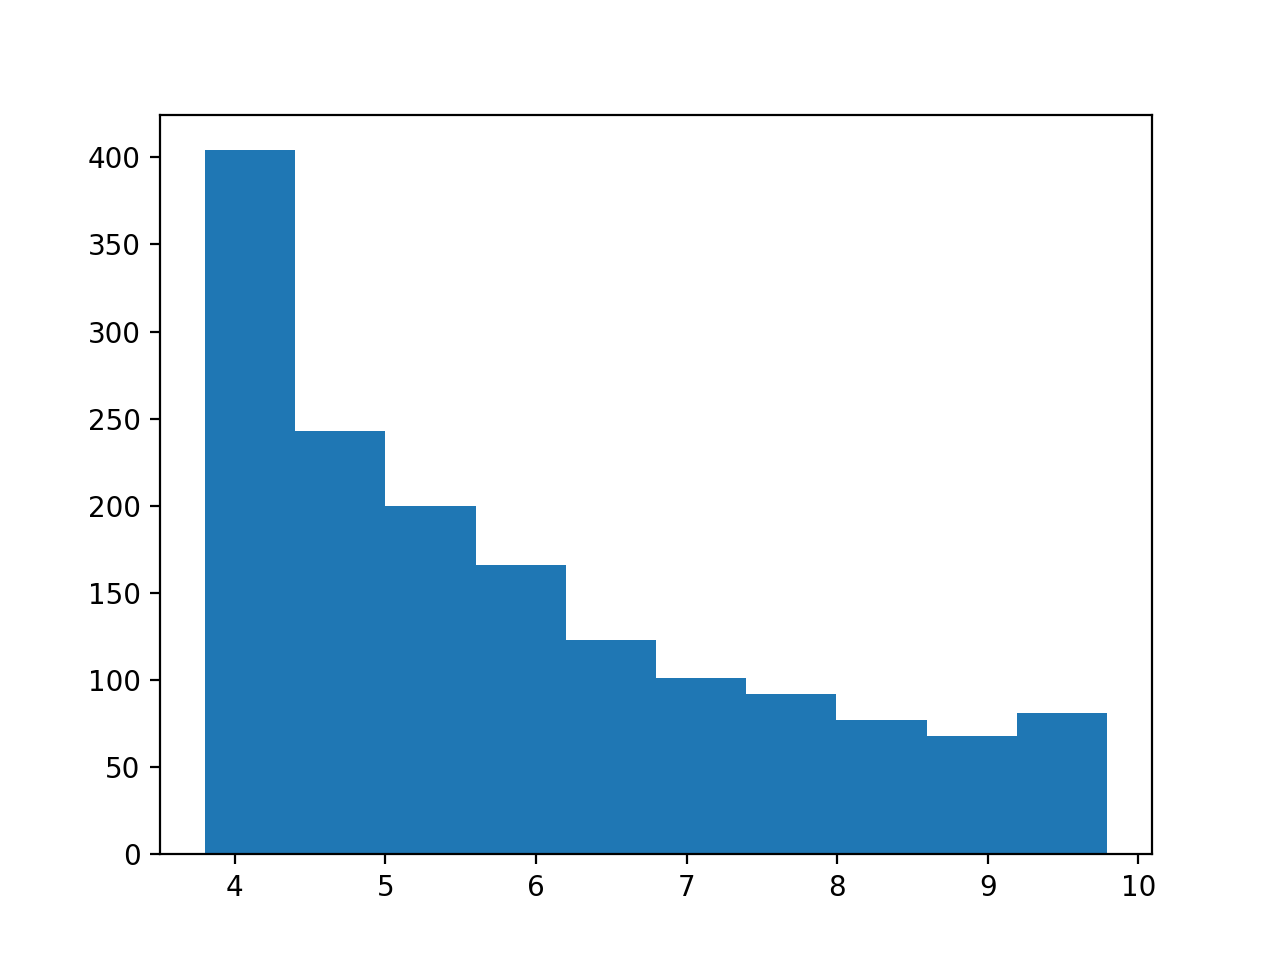

(array([404., 243., 200., 166., 123., 101.,  92.,  77.,  68.,  81.]),
 array([3.80259648, 4.40145273, 5.00030898, 5.59916523, 6.19802149,
        6.79687774, 7.39573399, 7.99459025, 8.5934465 , 9.19230275,
        9.791159  ]),
 <BarContainer object of 10 artists>)

In [114]:
%matplotlib notebook
plt.hist(filterdata.distance)

### Plots of various colors vs mean magnitudes

<IPython.core.display.Javascript object>


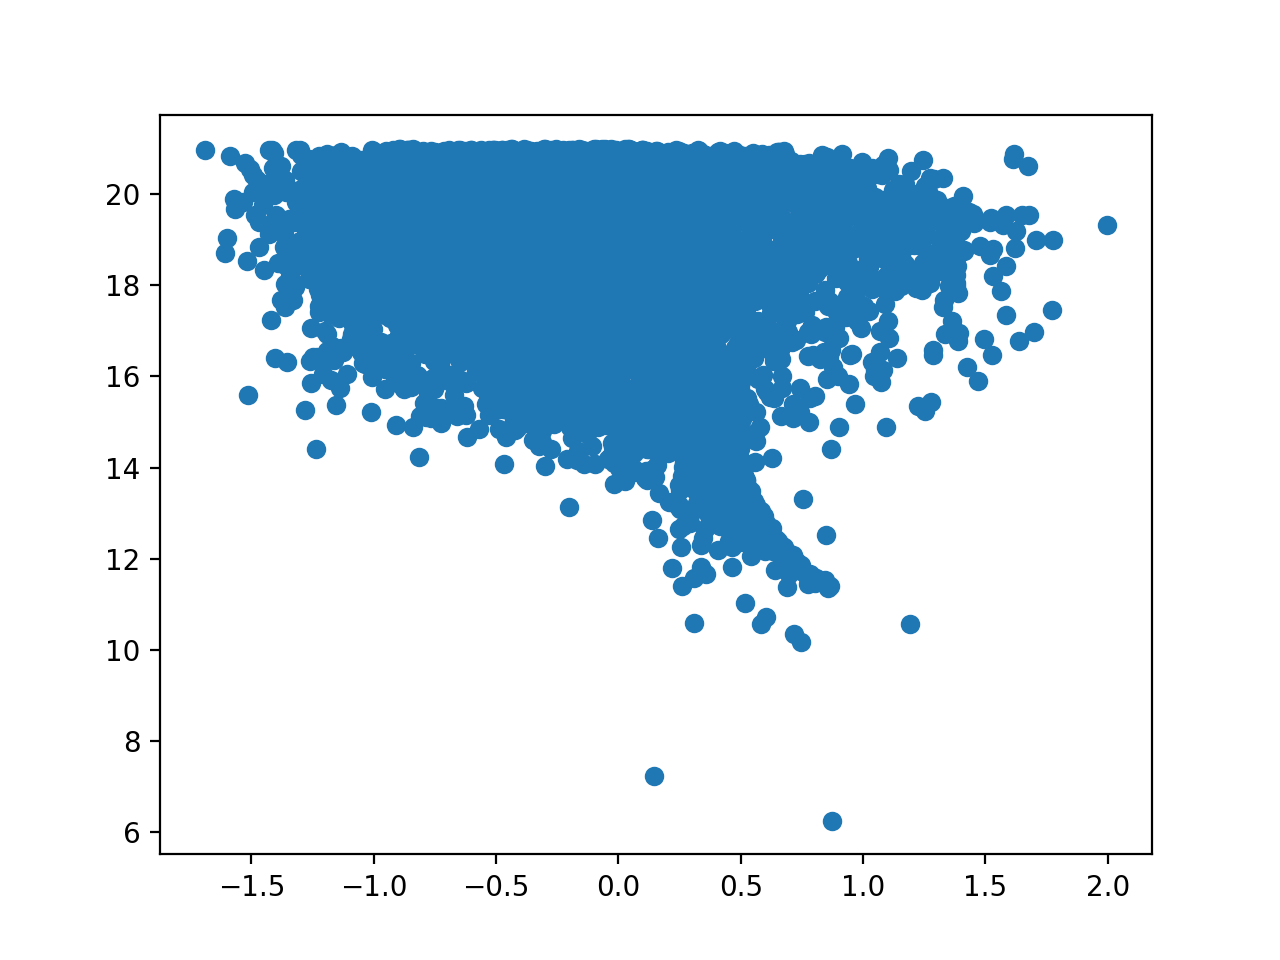

In [113]:
%matplotlib notebook  
plt.scatter(data.bp_g, data.phot_g_mean_mag) 

<IPython.core.display.Javascript object>


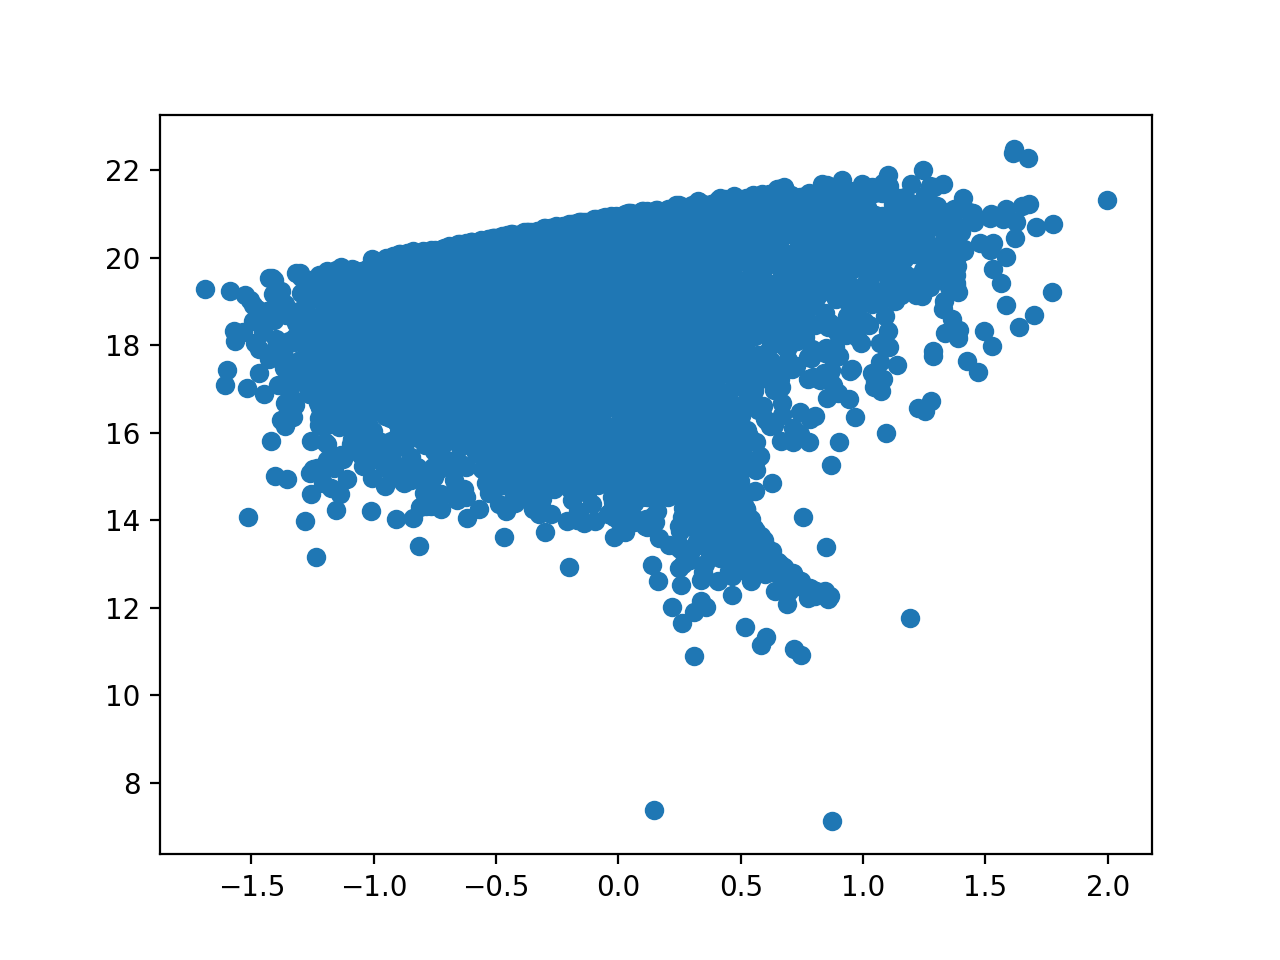

In [115]:
%matplotlib notebook  
plt.scatter(data.bp_g, data.phot_bp_mean_mag) 

<IPython.core.display.Javascript object>


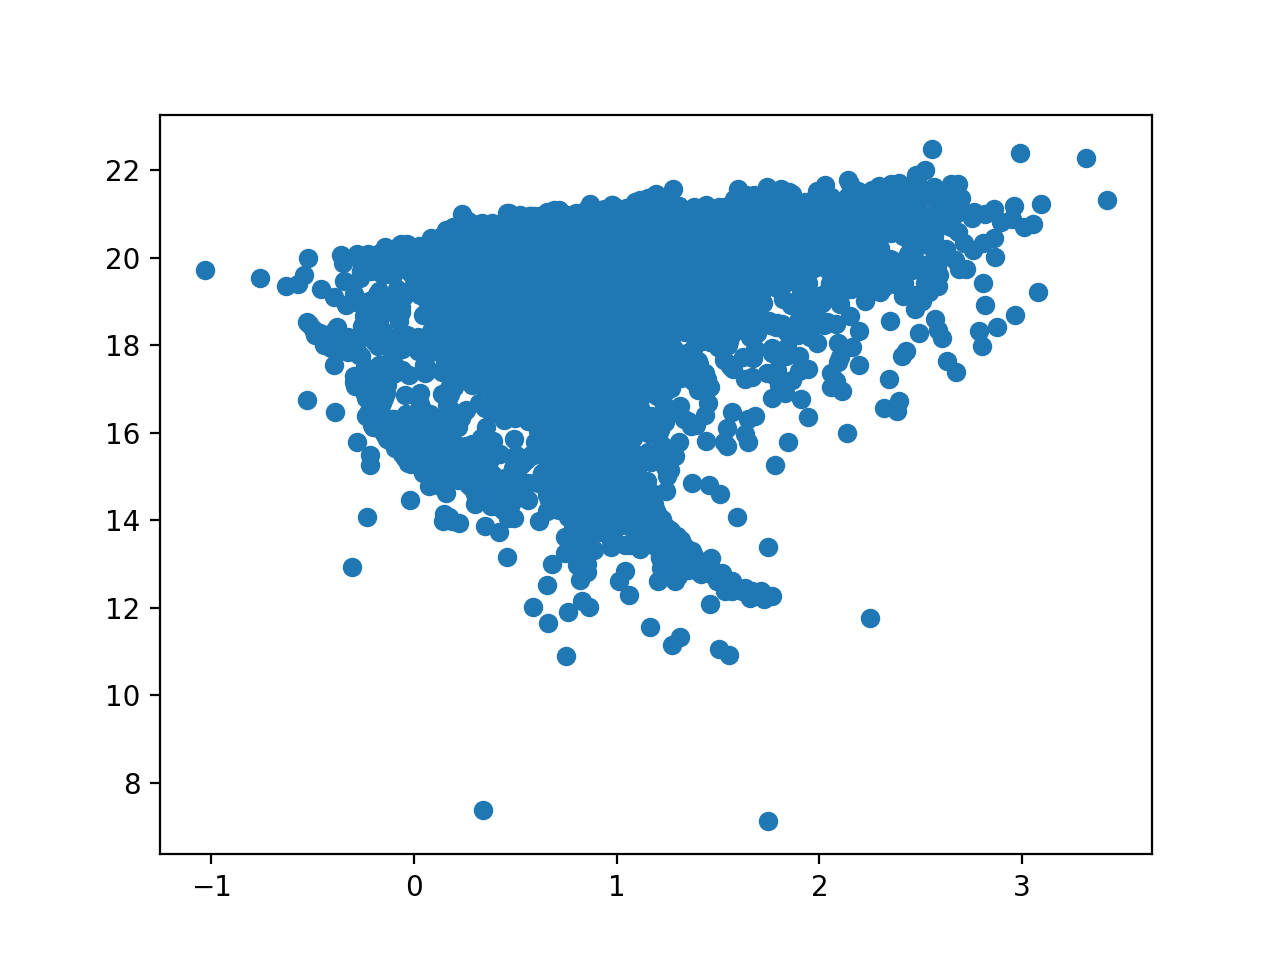

In [116]:
%matplotlib notebook  
plt.scatter(data.bp_rp, data.phot_bp_mean_mag) 

<IPython.core.display.Javascript object>


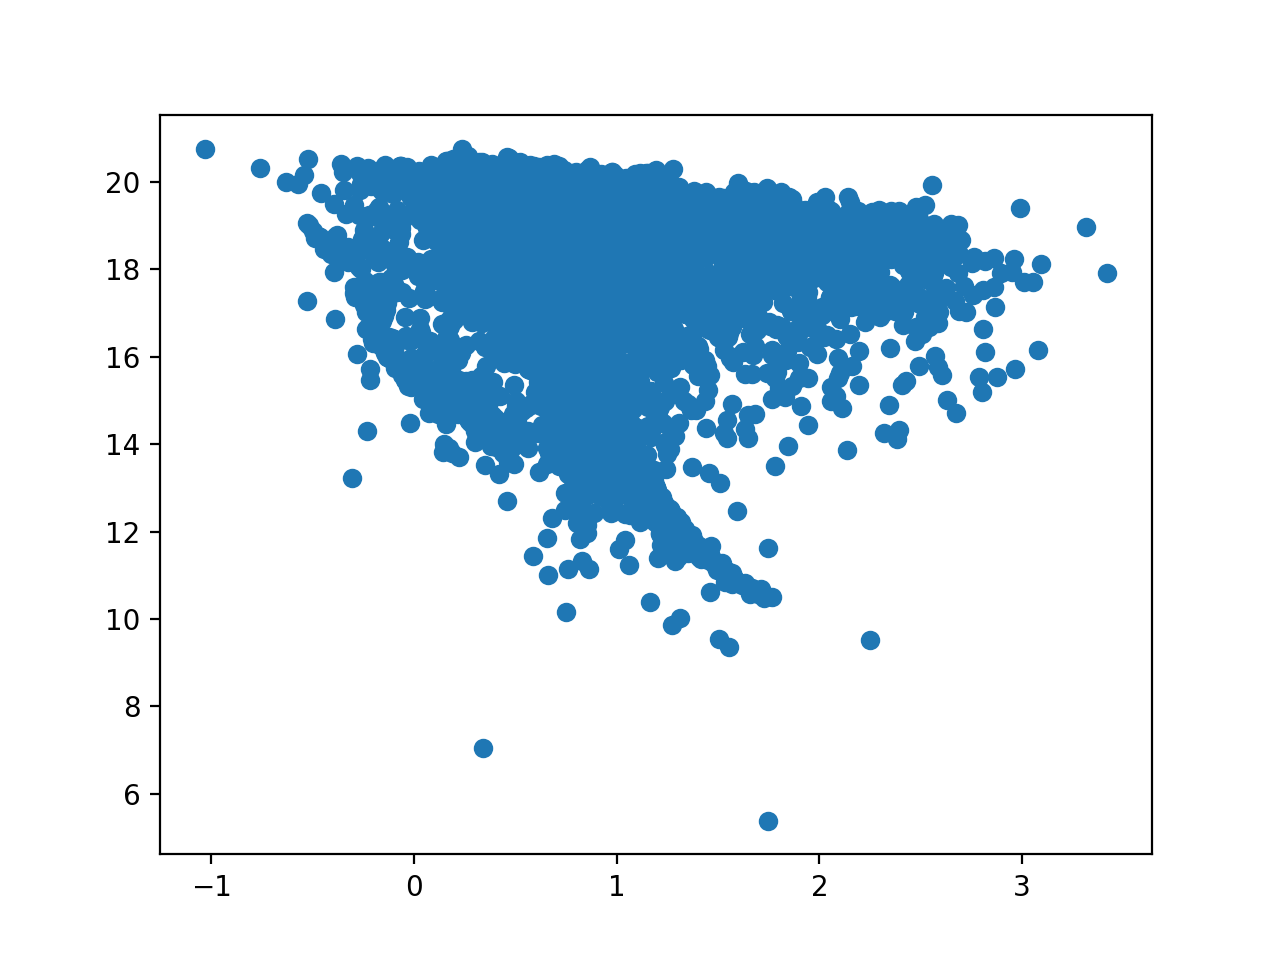

In [117]:
%matplotlib notebook  
plt.scatter(data.bp_rp, data.phot_rp_mean_mag) 

<IPython.core.display.Javascript object>


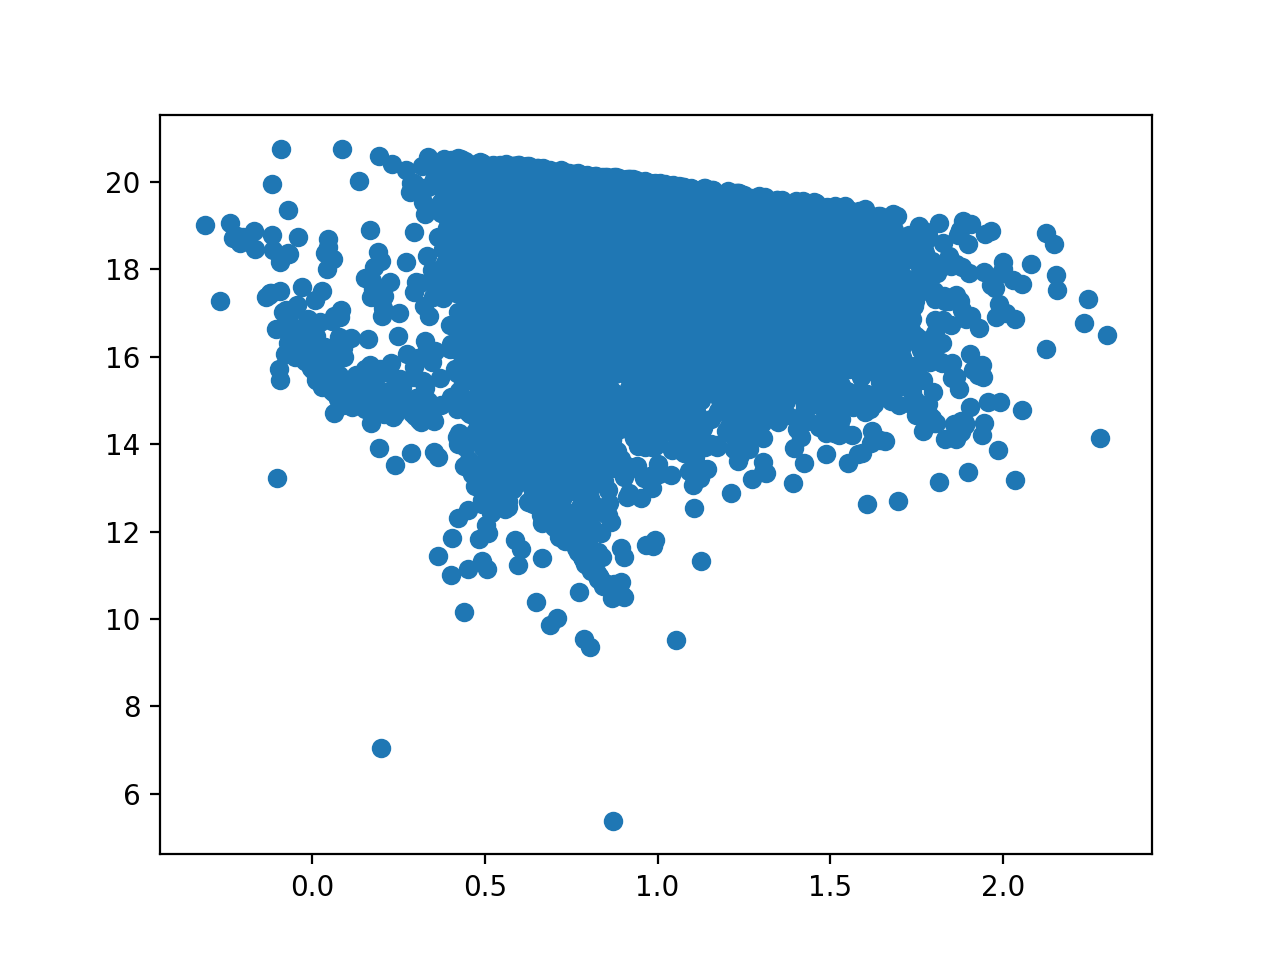

In [118]:
%matplotlib notebook  
plt.scatter(data.g_rp, data.phot_rp_mean_mag) 

<IPython.core.display.Javascript object>


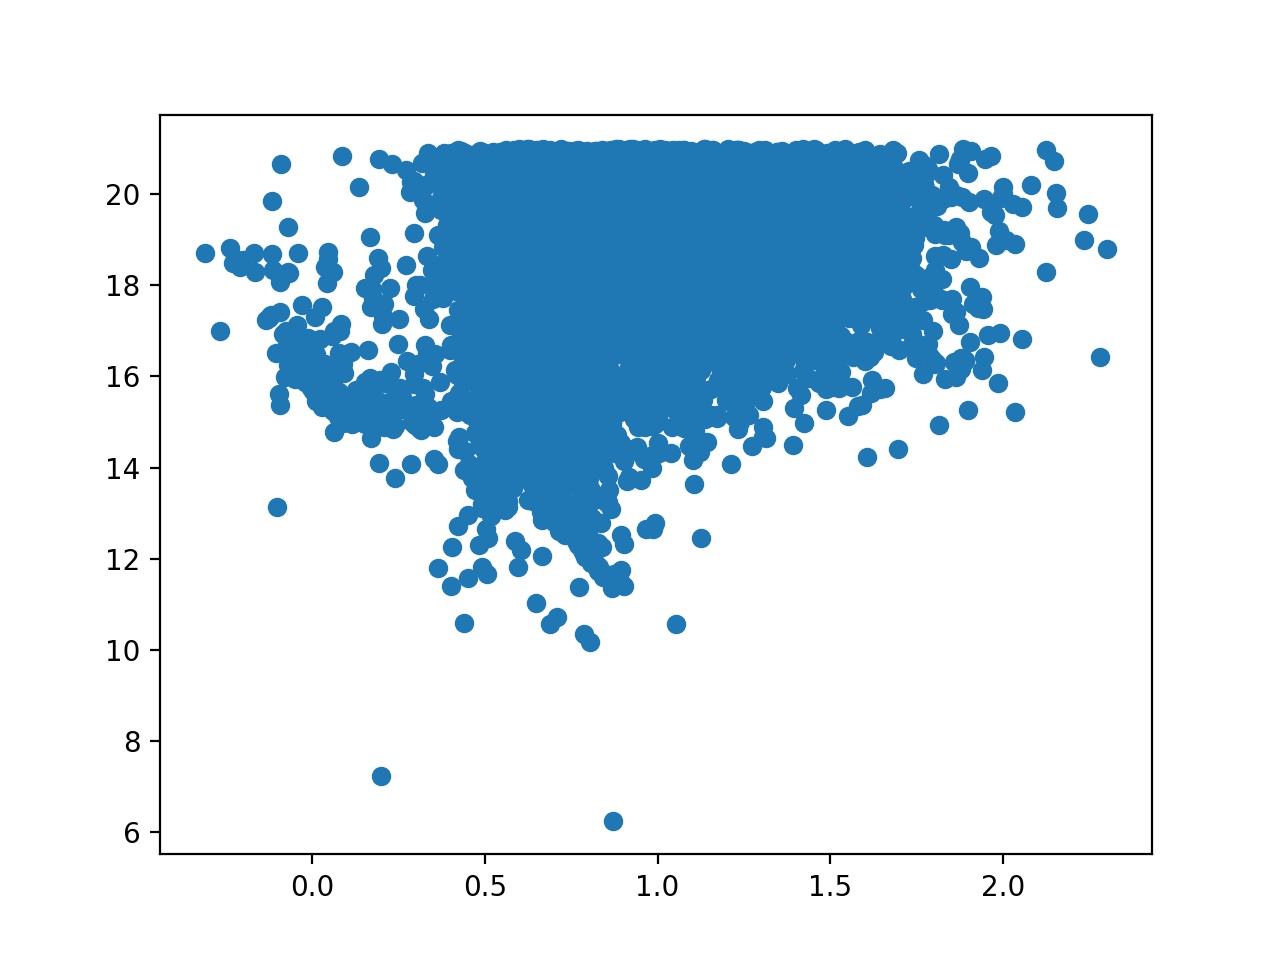

In [119]:
%matplotlib notebook  
plt.scatter(data.g_rp, data.phot_g_mean_mag) 

### Calculating absolute magnitudes of various colors

In [82]:
import numpy as np

In [83]:
data['M_g'] = data.phot_g_mean_mag - 5 * np.log10(data.distance * 1000) + 5

In [84]:
data['M_bp'] = data.phot_bp_mean_mag - 5 * np.log10(data.distance * 1000) + 5

In [85]:
data['M_rp'] = data.phot_rp_mean_mag - 5 * np.log10(data.distance * 1000) + 5

In [86]:
data

,ra,ra_error,dec,dec_error,parallax,parallax_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,bp_g,g_rp,distance,M_g,M_bp,M_rp
0,250.210403,0.155934,36.506006,0.179071,0.872153,0.201508,18.970665,19.559586,18.175150,1.384436,0.588921,0.795515,1.146587,8.673629,9.262550,7.878114
1,250.233695,0.165174,36.519477,0.193368,0.089205,0.214014,19.038458,19.216787,18.547806,0.668982,0.178329,0.490652,11.210128,3.790405,3.968734,3.299753
2,250.433752,0.457370,36.539471,0.453590,0.752001,0.530961,20.140720,19.898542,19.235739,0.662804,-0.242178,0.904982,1.329785,9.521812,9.279634,8.616831
3,250.514669,0.148344,36.346602,0.182498,0.201993,0.202575,18.593836,18.786358,18.118933,0.667425,0.192522,0.474903,4.950668,5.120517,5.313039,4.645614
4,250.757883,0.314347,36.595053,0.379377,0.645419,0.409077,19.861362,20.309706,19.060225,1.249481,0.448343,0.801138,1.549381,8.910571,9.358915,8.109434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16039,250.213732,0.267580,36.637694,0.308502,1.673577,0.346489,19.686330,20.967340,18.437843,2.529497,1.281010,1.248487,0.597523,10.804558,12.085568,9.556071
16040,250.365140,0.597345,36.589396,0.669289,0.250989,0.838290,20.649916,20.772890,20.127192,0.645699,0.122974,0.522724,3.984242,7.648187,7.771161,7.125463
16041,250.328326,0.265317,36.603832,0.285100,0.990049,0.333307,19.676842,19.887138,19.227903,0.659235,0.210297,0.448938,1.010051,9.655126,9.865422,9.206187
16042,250.211912,0.503066,36.589667,0.578281,0.058116,0.660381,20.507488,20.696276,19.938790,0.757486,0.188787,0.568699,17.206836,4.328983,4.517771,3.760285


### Filtering dataset to get more precise results

<IPython.core.display.Javascript object>


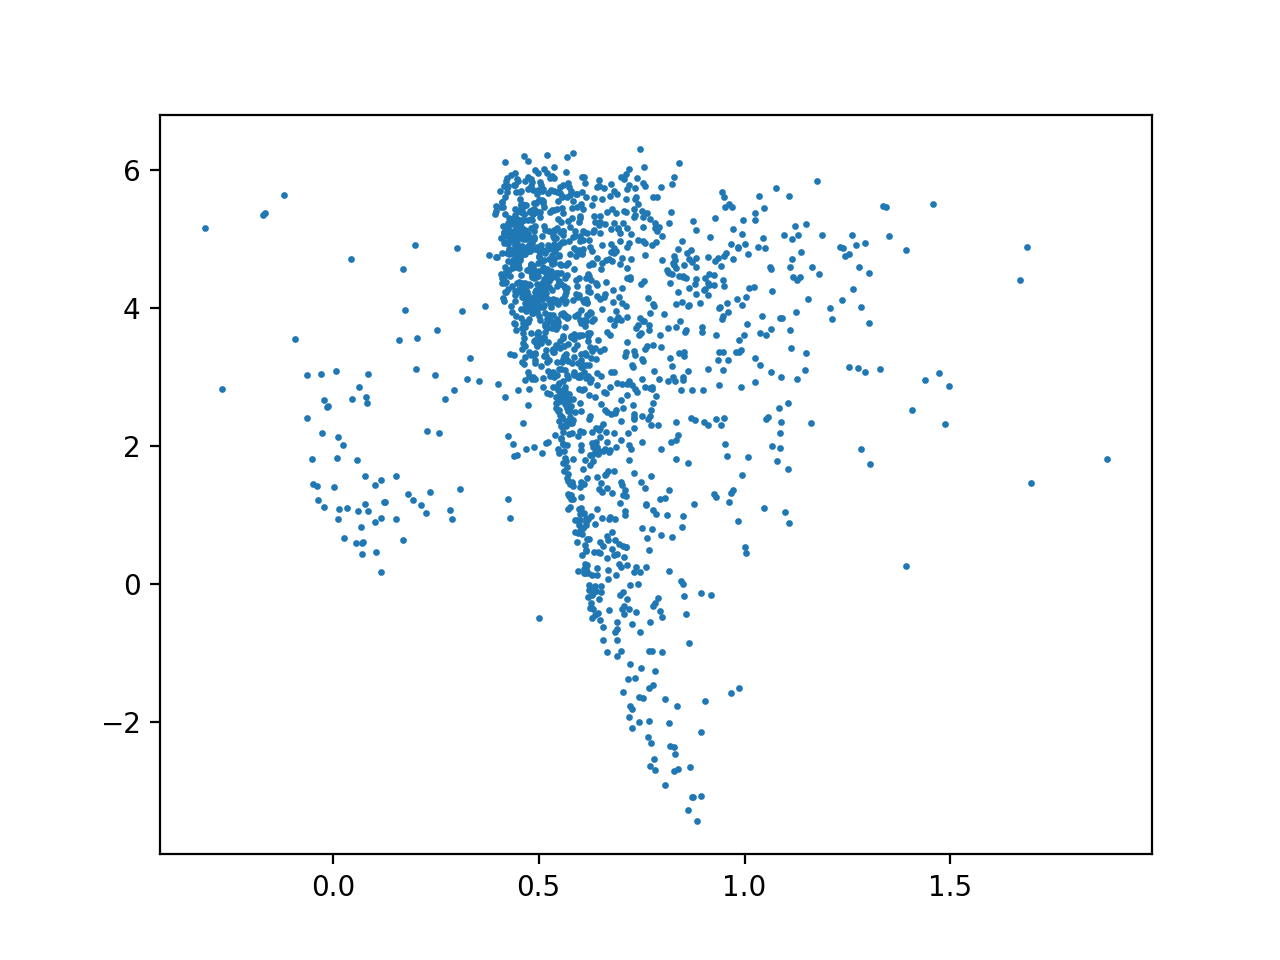

In [120]:
%matplotlib notebook
filterdata = data[data.distance<data.distance.max()]
filterdata = filterdata[filterdata.distance>0]
filterdata = filterdata[filterdata.distance<6.8+3]
filterdata = filterdata[filterdata.distance>6.8-3]
filterdata = filterdata[filterdata.parallax/filterdata.parallax_error>1]
plt.scatter(filterdata.g_rp, filterdata.M_g, s=2)

<IPython.core.display.Javascript object>


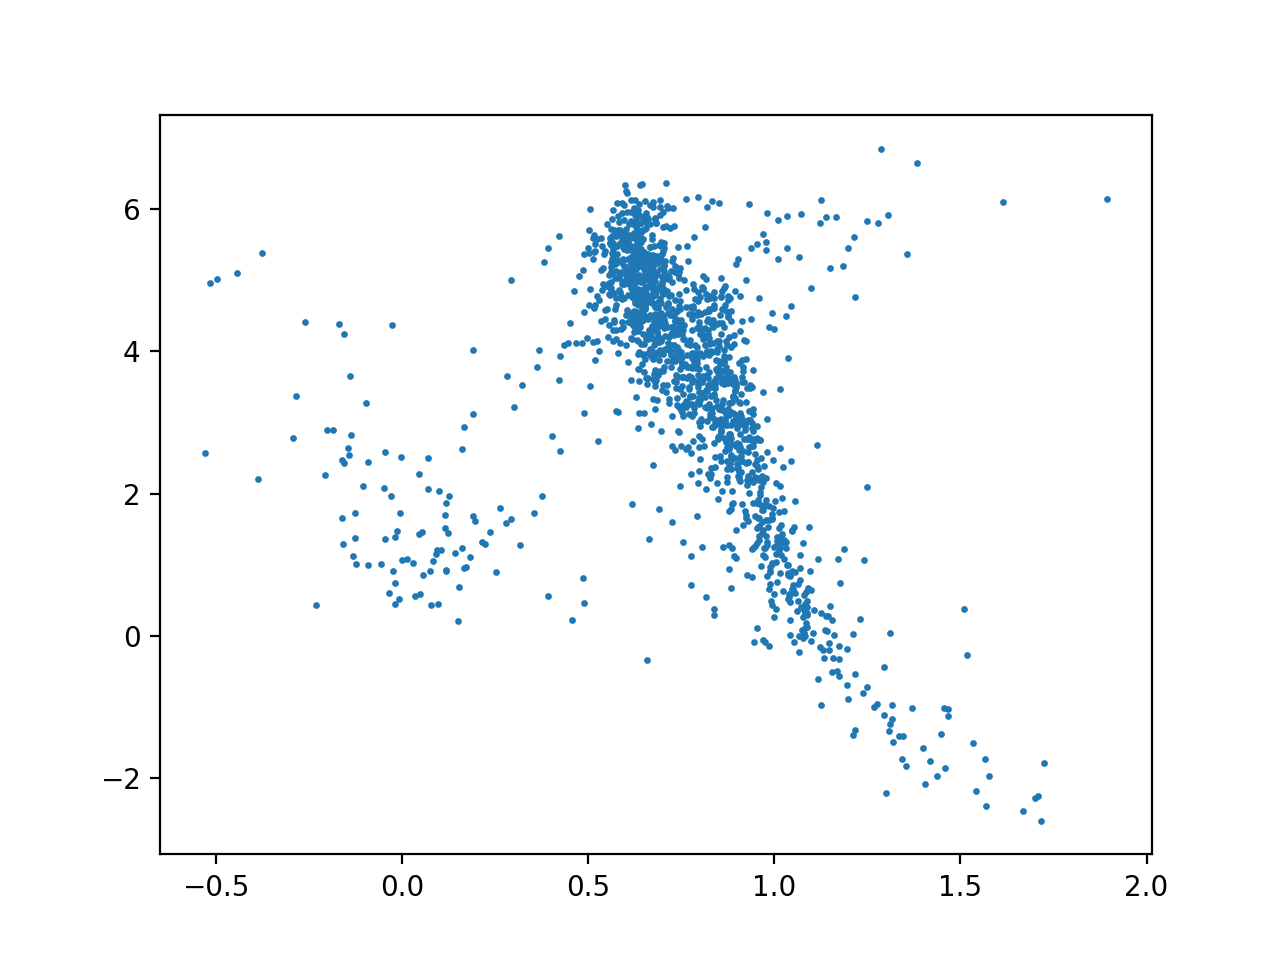

In [121]:
%matplotlib notebook
plt.scatter(filterdata.bp_rp, filterdata.M_bp, s=2)

### 3d plot of processed data

<IPython.core.display.Javascript object>


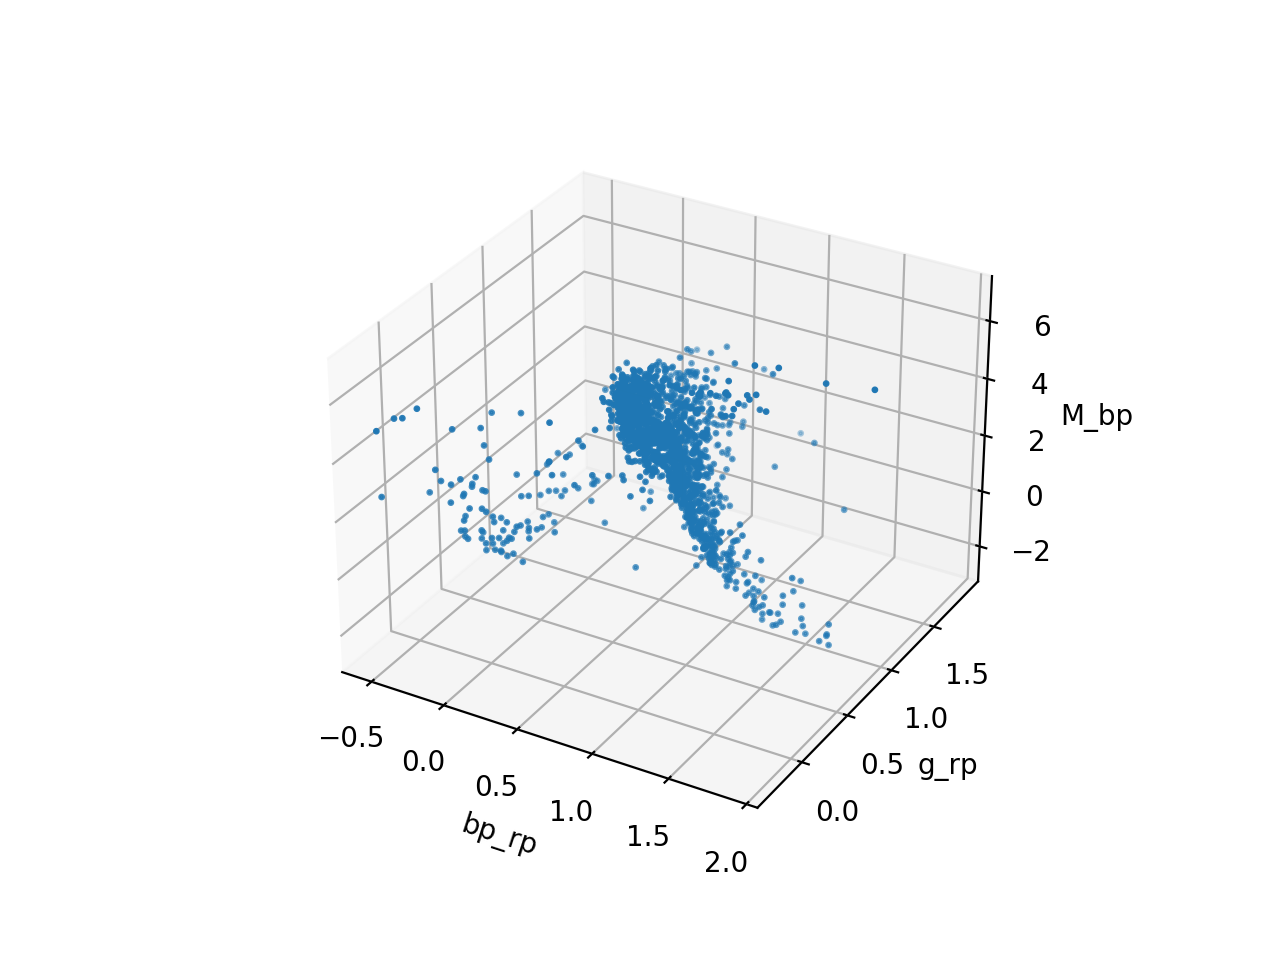

Text(0.5, 0, 'M_bp')

In [127]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(filterdata.bp_rp, filterdata.g_rp, filterdata.M_bp, s=2) 

ax.set_xlabel('bp_rp')
ax.set_ylabel('g_rp')
ax.set_zlabel('M_bp')

### Clustering attempts

#### KMeans

In [90]:
from sklearn.cluster import KMeans

In [91]:
kmeans = KMeans(n_clusters = 2)

In [92]:
kmeans.fit(filterdata[['bp_rp', 'g_rp', 'M_bp']])

KMeans(n_clusters=2)

kmeans.labels_

In [93]:
kmeans.labels_

array([1, 0, 1, ..., 0, 0, 0], dtype=int32)

<IPython.core.display.Javascript object>


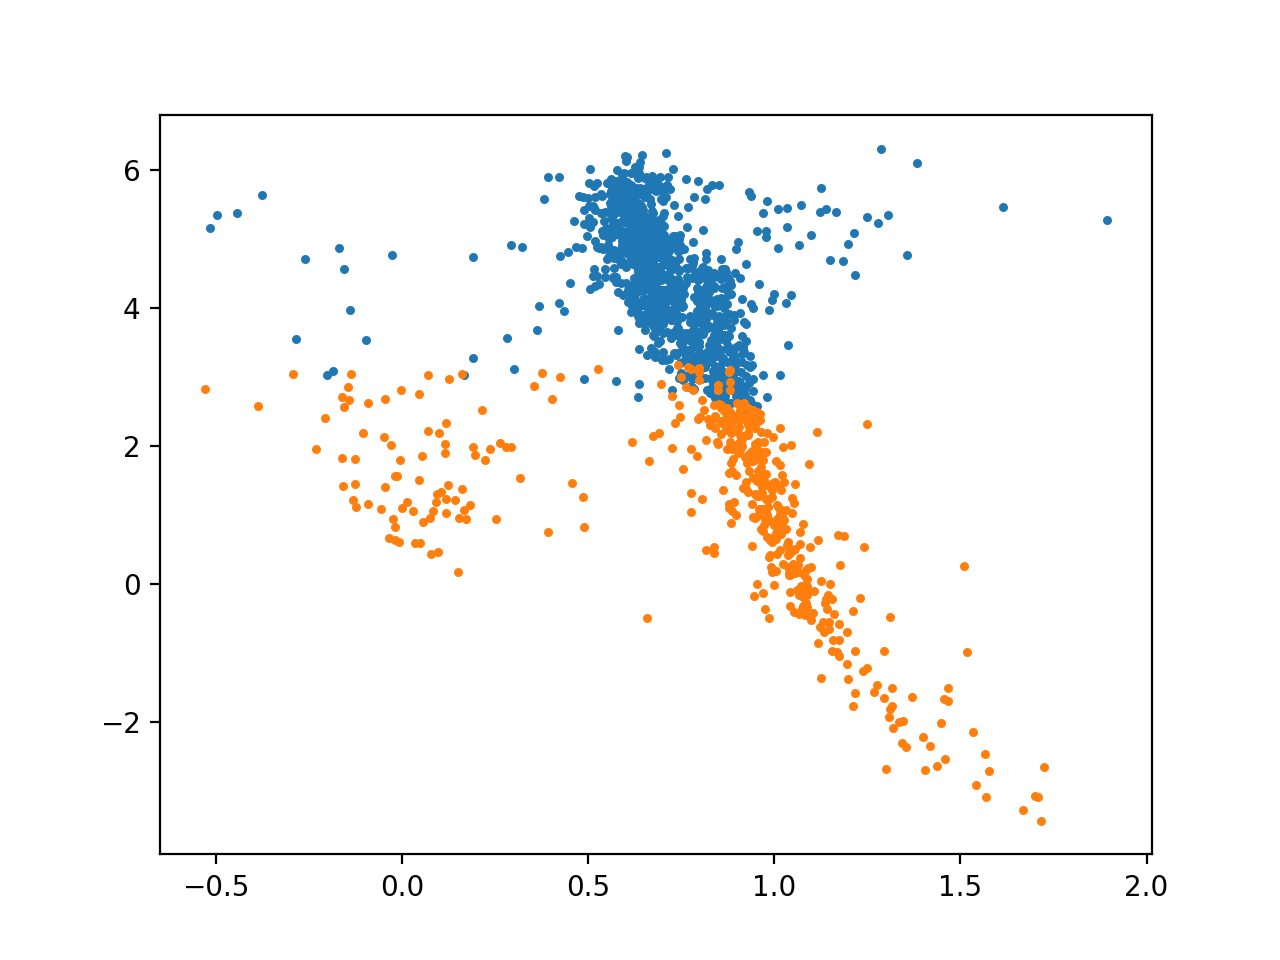

In [123]:
%matplotlib notebook
for i in range(2):
    cluster = filterdata[kmeans.labels_ == i]
    plt.scatter(cluster.bp_rp, cluster.M_g, s=5)

#### Spectral Clustering

In [95]:
from sklearn.cluster import SpectralClustering

In [96]:
spectral = SpectralClustering(n_clusters = 2, n_components = 4, gamma = 0.01)
spectral.fit(filterdata[['bp_rp', 'g_rp', 'M_bp']])

SpectralClustering(gamma=0.01, n_clusters=2, n_components=4)

<IPython.core.display.Javascript object>


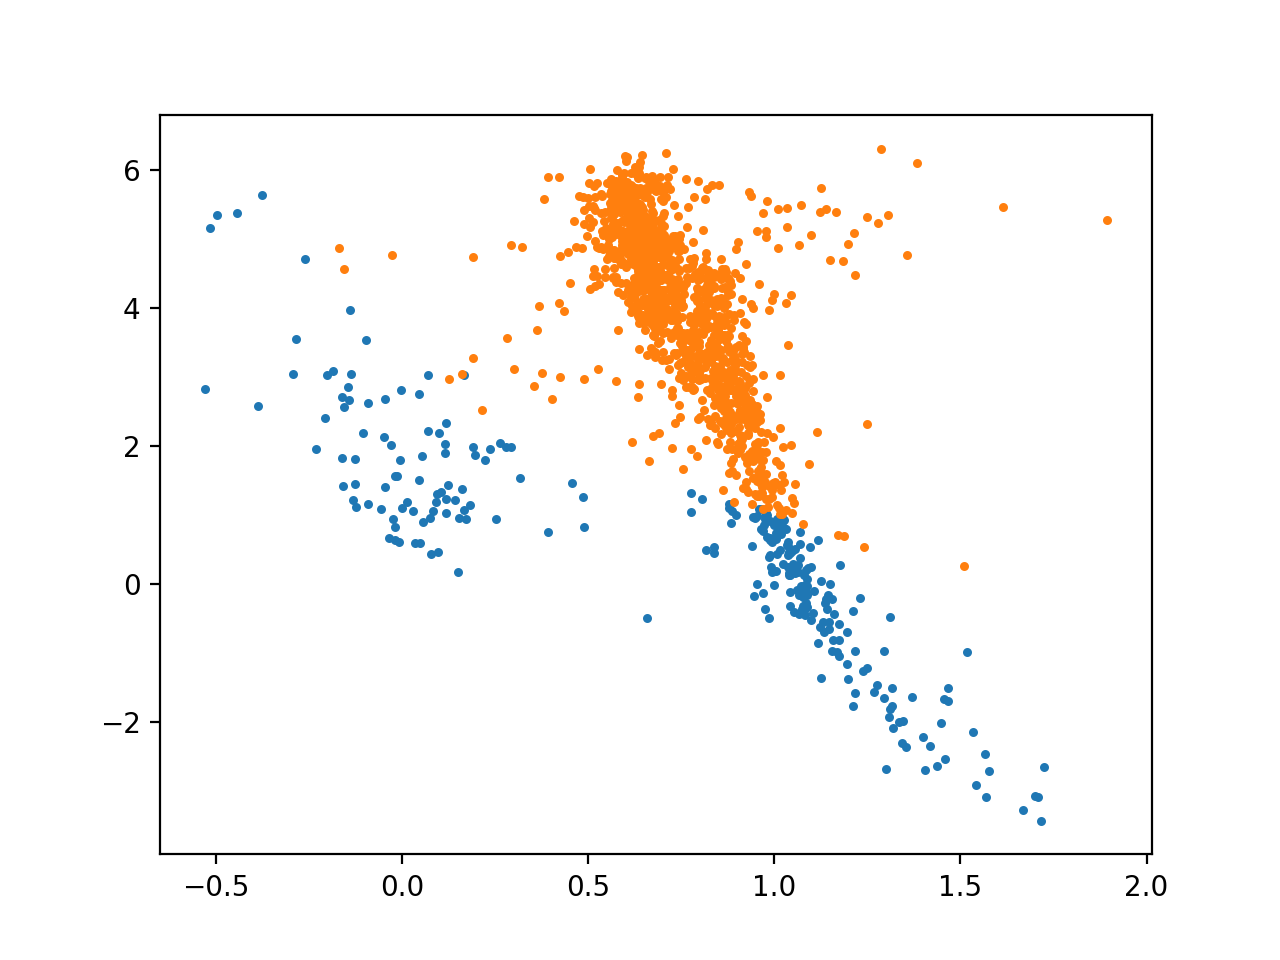

In [124]:
%matplotlib notebook
for i in range(2):
    cluster = filterdata[spectral.labels_ == i]
    plt.scatter(cluster.bp_rp, cluster.M_g, s = 5)

#### Agglomerative Clustering

In [98]:
from sklearn.cluster import AgglomerativeClustering

In [99]:
ward = AgglomerativeClustering(n_clusters = 2)
ward.fit(filterdata[['bp_rp', 'g_rp', 'M_bp']])

AgglomerativeClustering()

<IPython.core.display.Javascript object>


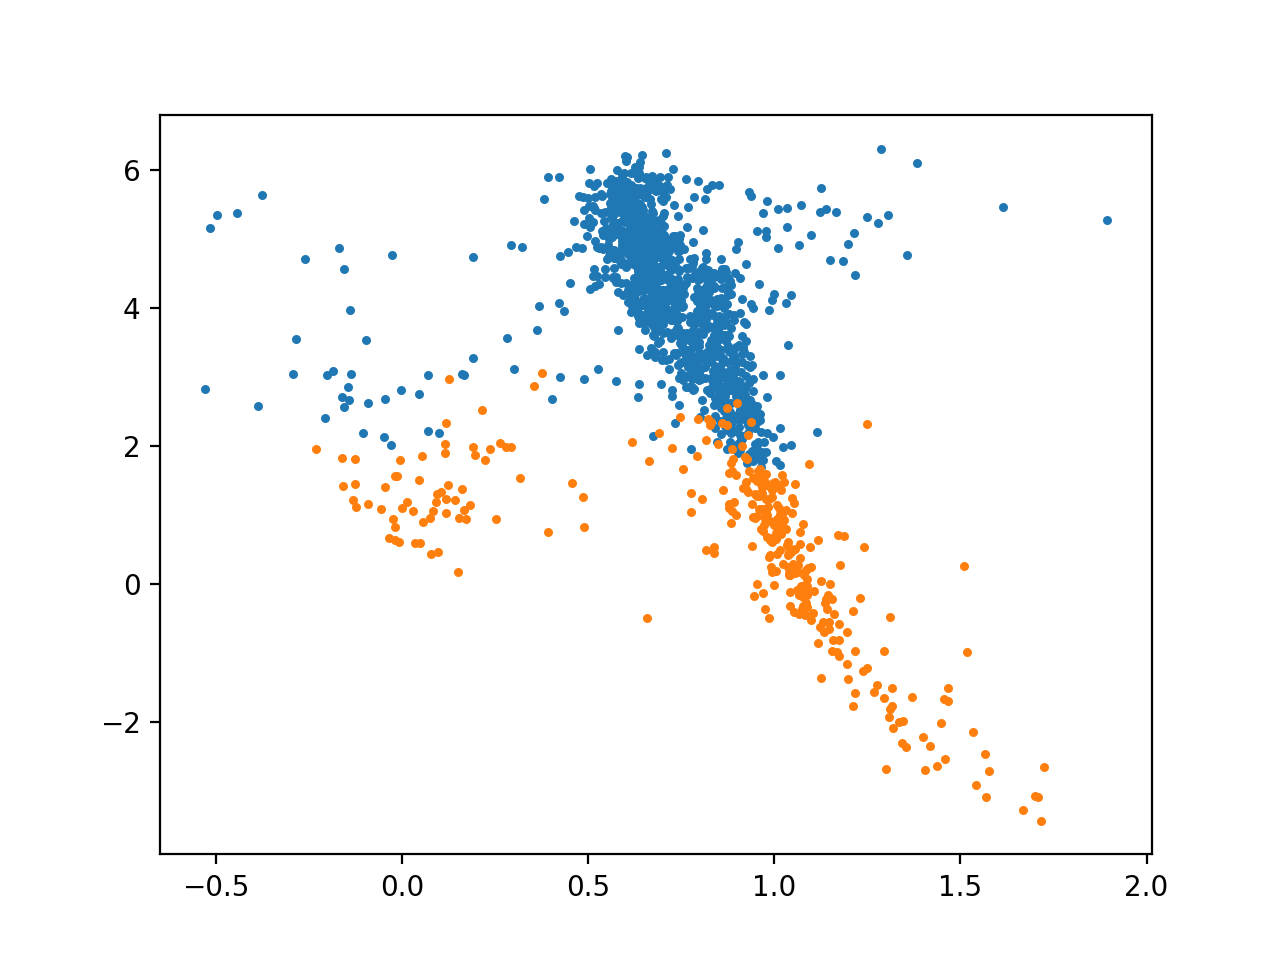

In [125]:
%matplotlib notebook
for i in range(2):
    cluster = filterdata[ward.labels_ == i]
    plt.scatter(cluster.bp_rp, cluster.M_g, s = 5)

#### Gaussian Attempt

In [101]:
from sklearn.mixture import GaussianMixture

In [102]:
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(filterdata[['bp_rp', 'g_rp', 'M_bp']])

GaussianMixture(n_components=2, random_state=0)

In [103]:
gmm.means_

array([[0.8158285 , 0.57754084, 3.51988623],
       [0.59449813, 0.73927683, 3.56770138]])

In [104]:
gmm.predict(filterdata[['bp_rp', 'g_rp', 'M_bp']])

array([0, 0, 0, ..., 0, 1, 0])

In [105]:
%matplotlib notebook
